In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
import Boundary_Functions as bf

from mpmath import *
from pynverse import inversefunc
from scipy.special import gamma as gamma
from scipy.special import gammaincc as gamma3
from mpmath import gammainc as gamma2

#import warnings
#warnings.filterwarnings("ignore")


In [2]:
M0=1.0
Q=0.95
ru0=5.0
dr0v=0.4

N=20
umax=13
vmax=200
du0=M0/N
dv0=du0

Nu=int(N*umax)
Nv=int(N*vmax)

rplus=M0+(M0**2-Q**2)**(0.5)
rminus=M0-(M0**2-Q**2)**(0.5)

In [3]:
print(bf.rbounrninv(5.1,M0,Q,ru0,dr0v*bf.esigrn(M0,Q,ru0)))
print(bf.esigrn(M0,Q,ru0))
print(bf.dr2rn(M0,Q,dr0v,ru0))

0.1376515120410069
1.8592264486151873
-0.3975625


1.8592264486151873
[ 5.          4.98012188  4.96024375  4.94036563  4.9204875   4.90060938
  4.88073125  4.86085313  4.840975    4.82109688  4.80121875  4.78134063
  4.7614625   4.74158438  4.72170625  4.70182813  4.68195     4.66207187
  4.64219375  4.62231562  4.6024375   4.58255937  4.56268125  4.54280312
  4.522925    4.50304687  4.48316875  4.46329062  4.4434125   4.42353438
  4.40365625  4.38377813  4.3639      4.34402188  4.32414375  4.30426563
  4.2843875   4.26450938  4.24463125  4.22475313  4.204875    4.18499687
  4.16511875  4.14524062  4.1253625   4.10548437  4.08560625  4.06572812
  4.04585     4.02597187  4.00609375  3.98621562  3.9663375   3.94645937
  3.92658125  3.90670312  3.886825    3.86694688  3.84706875  3.82719063
  3.8073125   3.78743438  3.76755625  3.74767813  3.7278      3.70792188
  3.68804375  3.66816563  3.6482875   3.62840937  3.60853125  3.58865312
  3.568775    3.54889687  3.52901875  3.50914063  3.4892625   3.46938437
  3.44950625  3.42962812  3.4097

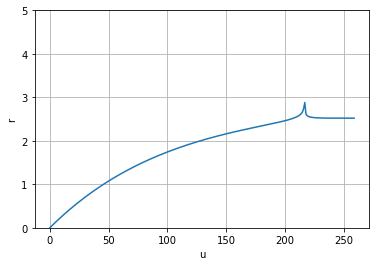

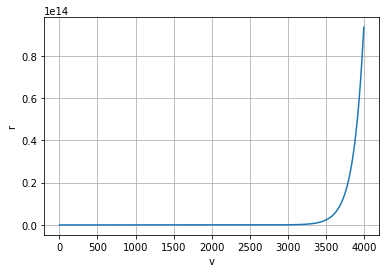

[ 0.          0.02676843  0.05328936  0.07956496  0.10559739  0.13138877
  0.15694123  0.18225686  0.20733774  0.23218594  0.2568035   0.28119246
  0.30535483  0.32929261  0.35300777  0.37650229  0.39977811  0.42283716
  0.44568136  0.46831261  0.49073279  0.51294378  0.53494743  0.55674558
  0.57834005  0.59973265  0.62092518  0.64191941  0.66271712  0.68332004
  0.70372992  0.72394848  0.74397743  0.76381846  0.78347325  0.80294347
  0.82223078  0.8413368   0.86026317  0.8790115   0.89758339  0.91598042
  0.93420418  0.95225622  0.97013809  0.98785133  1.00539746  1.02277799
  1.03999442  1.05704824  1.07394093  1.09067394  1.10724874  1.12366675
  1.13992941  1.15603814  1.17199433  1.1877994   1.20345471  1.21896165
  1.23432157  1.24953582  1.26460575  1.27953269  1.29431795  1.30896284
  1.32346867  1.33783672  1.35206828  1.3661646   1.38012695  1.39395658
  1.40765473  1.42122263  1.4346615   1.44797255  1.46115699  1.47421601
  1.48715079  1.4999625   1.51265233  1.52522142  1

In [4]:
rlistu=ru0+bf.dr2rn(M0,Q,dr0v,ru0)*np.arange(0,umax,du0)
rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

print(bf.esigrn(M0,Q,ru0))
print(rlistu)

ulist=np.empty((Nu))
vlist=np.empty((Nv))

for i in range(0,Nu):
    ulist[i]=bf.rbounrninv(float(rlistu[i]),M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(1))

for j in range(0,Nv):
    vlist[j]=bf.rbounrninv(float(rlistv[j]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

plt.plot(ulist)#,rlistu)
plt.xlabel('u')
plt.ylabel('r')
#plt.xlim(0,1)
plt.ylim(0,5)
plt.grid()
plt.show()    
    
plt.plot(vlist)#,rlistv)
plt.xlabel('v')
plt.ylabel('r')
#plt.xlim(0,1)
#plt.ylim(4,5)
plt.grid()
plt.show()

print(ulist)

In [5]:
bf.rbounrninv(ru0,M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(0))

0.0

#ulist=np.arange(0,10,.1)

rlist=np.zeros((Nu,Nv))*np.nan

#rbounrnu= inversefunc(bf.rbounrninv,args=(M0,Q,ru0,bf.drrn(M0,Q,dr0v,ru0)),domain=[0,6],open_domain=[False,False],image=[0,100])
#rbounrnv= inversefunc(bf.rbounrninv,args=(M0,Q,ru0,dr0v),domain=[0,20],open_domain=[False,False],image=[0,1000])

for i in range(0,Nu):
    
    rlist[i][0]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,i)
    print(rlist[i][0])
    
for j in range(0,Nv):
    
    rlist[0][j]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,0)

plt.plot(ulist,rlist[:,0])
plt.show()

In [6]:
rlist=np.zeros((Nu,Nv))*np.nan

for i in range(0,Nu):
    #for j in range(0,Nv):
    rlist[i]=bf.rrn(M0,Q,ru0,dr0v,0.0,ulist,vlist,i).reshape(Nv)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Brandon Piotrzkowski\OneDrive\Research\Summer 2017 Research\py codes\notebooks\Boundary_Functions.py:144: RuntimeWarning: invalid value encountered in power
  return 1/r**2*dr0*mth.exp(2*kplus*(ru0-r))*(r-rminus)**(1+kplus/kminus)*(ru0-rminus)**(-1-kplus/kminus)*ru0**2#*mth.exp(sig)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


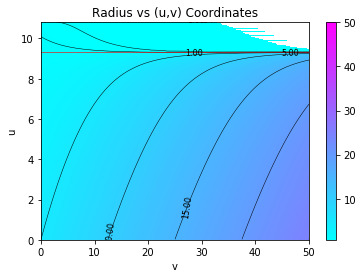

In [21]:
levels=[.683,.685,.69,1.0,5.0,10.0,15.0,20.0,25.0,30.0]

plot1=plt.imshow(rlist,cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower',vmax=50)
plot4=plt.contour(rlist, levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(rlist, [rminus],linewidths=0.6,colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(rlist, [rplus],linewidths=0.6,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels,  
           inline=0, inline_spacing=0, 
           fmt='%1.2f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,50)
plt.ylim(0,10.8)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('Test1-2.png',dpi=300)
plt.show()

In [8]:
urange0=np.zeros((Nu))
vrange0=np.zeros((Nv))

dt=du0
for i in range(0,Nu-1):
    #r=rlist[i][0]
    #esig=32*M0**(3.0)/r*mth.exp(-r/(2*M0))
    try:
        urange0[i+1]=urange0[i]+dt
    except OverflowError:
        urange0[i+1]=np.nan
for j in range(0,Nv-1):
    #r=rlist[0][j]
    #esig=32*M0**3/r*mth.exp(-r/(2*M0))
    try:
        vrange0[j+1]=vrange0[j]+dt
    except OverflowError:
        vrange0[j+1]=np.nan
    
    
print(urange0)

[  0.     0.05   0.1    0.15   0.2    0.25   0.3    0.35   0.4    0.45
   0.5    0.55   0.6    0.65   0.7    0.75   0.8    0.85   0.9    0.95   1.
   1.05   1.1    1.15   1.2    1.25   1.3    1.35   1.4    1.45   1.5
   1.55   1.6    1.65   1.7    1.75   1.8    1.85   1.9    1.95   2.     2.05
   2.1    2.15   2.2    2.25   2.3    2.35   2.4    2.45   2.5    2.55
   2.6    2.65   2.7    2.75   2.8    2.85   2.9    2.95   3.     3.05
   3.1    3.15   3.2    3.25   3.3    3.35   3.4    3.45   3.5    3.55
   3.6    3.65   3.7    3.75   3.8    3.85   3.9    3.95   4.     4.05
   4.1    4.15   4.2    4.25   4.3    4.35   4.4    4.45   4.5    4.55
   4.6    4.65   4.7    4.75   4.8    4.85   4.9    4.95   5.     5.05
   5.1    5.15   5.2    5.25   5.3    5.35   5.4    5.45   5.5    5.55
   5.6    5.65   5.7    5.75   5.8    5.85   5.9    5.95   6.     6.05
   6.1    6.15   6.2    6.25   6.3    6.35   6.4    6.45   6.5    6.55
   6.6    6.65   6.7    6.75   6.8    6.85   6.9    6.95   7.     

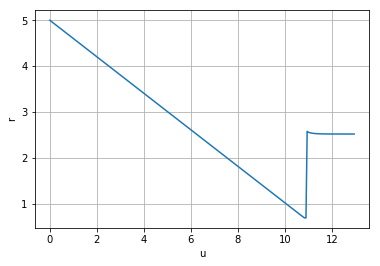

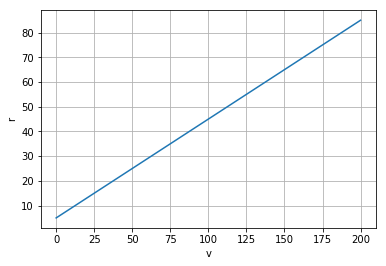

In [9]:
plt.plot(urange0,rlist[:,0])
plt.xlabel('u')
plt.ylabel('r')

plt.grid()
plt.show()

plt.plot(vrange0,rlist[0,:])
plt.xlabel('v')
plt.ylabel('r')
plt.grid()
plt.show()

In [10]:
#for i in range(0,Nu):
    #print(rlist[i,0])
    
#for j in range(0,Nv):
    #print(rlist[0,j])

In [11]:
print(rlist[:,:])

[[  5.           5.02000002   5.04000003 ...,  84.94000148  84.96000151
   84.98000153]
 [  4.98012186   5.00008091   5.02004023 ...,  84.90945212  84.92945197
   84.94945182]
 [  4.96024369   4.98016147   5.00007982 ...,  84.87883975  84.89883943
   84.91883911]
 ..., 
 [  2.52120971   2.53219724   2.54323164 ...,  80.15202854  80.17200005
   80.19197157]
 [  2.52119666   2.53218411   2.54321843 ...,  80.15199204  80.17196355
   80.19193508]
 [  2.52117954   2.53216688   2.54320109 ...,  80.15194417  80.17191568
   80.19188721]]


In [12]:


#print(rlist[:,0])
print((rlist[1,0]-rlist[0,0])/(urange0[1]-urange0[0]))
der1=(rlist[11,0]-rlist[10,0])/(urange0[11]-urange0[10])
print(der1)

#print(rlist[0,:])
print((rlist[0,1]-rlist[0,0])/(vrange0[1]-vrange0[0]))
der2=(rlist[0,11]-rlist[0,10])/(vrange0[11]-vrange0[10])
print(der2)

-0.397562794813
-0.39756233042
0.400000410349
0.40000024098


In [13]:
s=-.10
x=7.5


#print(gamma2(s,0,x))
print(gamma(s)*(gamma3(s,x)))
print(((s-1)*gamma3(s-1,x)*gamma(s-1)-x**(s-1)*mth.exp(-x)))
print((gamma3(s+1,x)*gamma(s+1)-(x)**(s)*mth.exp(-x))/s)

nan
nan
5.32404526451e-05


In [14]:
print(bf.drrn(M0,Q,bf.drrn(M0,Q,dr0v,100),100))

0.4


In [15]:
print(bf.rbounrninv(float(rlist[0][0]),M0,Q,ru0,dr0v))

0.0


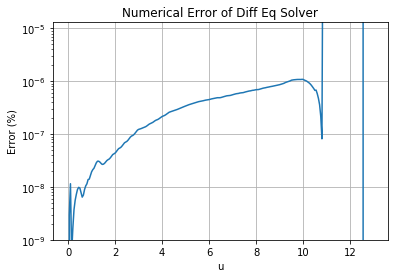

In [16]:
#plt.plot(ulist2,abs(ulist-ulist2)/ulist)
plt.plot(urange0,abs(rlist[:,0]-rlistu)/rlistu)
plt.ylim(10**(-9),1.3*10**(-5))
#plt.xlim(0,N*11)
plt.title('Numerical Error of Diff Eq Solver')
plt.yscale('log')
plt.ylabel('Error (%)')
plt.xlabel('u')
plt.grid()
plt.savefig('Diffeq-error.png',dpi=300)
plt.show()
#print(ulist-ulist2)

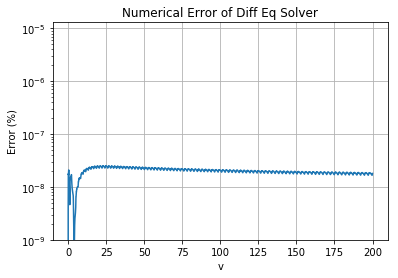

In [17]:
#plt.plot(ulist2,abs(ulist-ulist2)/ulist)
plt.plot(vrange0,abs(rlist[0,:]-rlistv)/rlistv)
plt.ylim(10**(-9),1.3*10**(-5))
#plt.xlim(0,N*11)
plt.title('Numerical Error of Diff Eq Solver')
plt.yscale('log')
plt.ylabel('Error (%)')
plt.xlabel('v')
plt.grid()
#plt.savefig('Test1-2.png',dpi=300)
plt.show()
#print(rlist-ulist2)

In [18]:
print(rlist)

[[  5.           5.02000002   5.04000003 ...,  84.94000148  84.96000151
   84.98000153]
 [  4.98012186   5.00008091   5.02004023 ...,  84.90945212  84.92945197
   84.94945182]
 [  4.96024369   4.98016147   5.00007982 ...,  84.87883975  84.89883943
   84.91883911]
 ..., 
 [  2.52120971   2.53219724   2.54323164 ...,  80.15202854  80.17200005
   80.19197157]
 [  2.52119666   2.53218411   2.54321843 ...,  80.15199204  80.17196355
   80.19193508]
 [  2.52117954   2.53216688   2.54320109 ...,  80.15194417  80.17191568
   80.19188721]]


In [19]:
scal=2
uplac=int(9/11*Nu+5)


rlistv3=ru0+dr0v*np.arange(0,vmax*scal,dv0/scal)
vlist2=np.empty((Nv*scal))

for j in range(0,Nv*scal):
    vlist2[j]=bf.rbounrninv(float(rlistv3[j]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

rlistv3=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist2,uplac).reshape(Nv*scal)




TypeError: rrn() missing 1 required positional argument: 'i'

In [ ]:
rlistv3f=rlistv3[::scal]


plt.plot(vrange0,abs(rlist[uplac,:]-rlistv3f)/rlistv3f)
plt.show()



print(rlist[int(9/10*Nu),:]-rlistv3f)
#print(rlistv3f[:7000])

In [ ]:
plt.plot(vrange0,rlist[uplac,:])
plt.show()

plt.plot(vrange0,rlistv3f)
plt.show()

In [ ]:
#for j in range(0,Nv):
    #print(rlistv3[2*j]-rlistv3f[j])
    